# Código de corrección de bit-flip
Este notebook contiene la implementación del código de corrección de un bit-flip. 

In [1]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_bloch_multivector, plot_distribution

backend=Aer.get_backend('aer_simulator')

En vez de esperar a que se produzca un error se simula el error.

Bit del flip (none para ninguno): 0


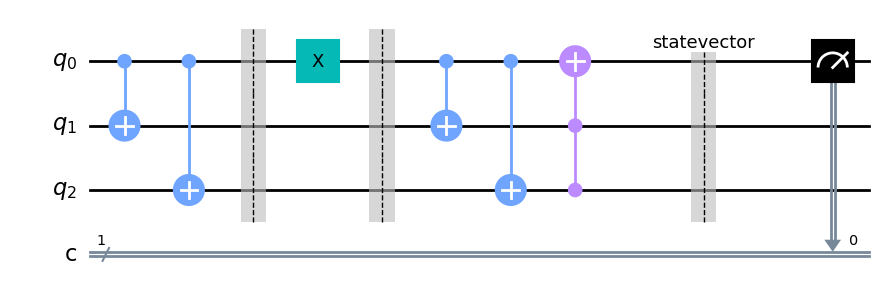

In [2]:
#Creo el circuito con error simulado y correccion de bit-flip
qc=QuantumCircuit(3,1)

#Codifico
qc.cx(0,1)
qc.cx(0,2)

qc.barrier()

#Simulo un bit-flip dentro del circuito
while(True):
    bit=input("Bit del flip (none para ninguno):")
    if bit == 'none':
        break
    try:
        ibit=int(bit)
        if ibit > 2:
            print("Tiene que ser un número entre 0 y 2")
            continue
        qc.x(ibit)    
        break
    except:
        print("Tiene que ser un número entre 0 y 2 o none")

qc.barrier()

#Decodifico
qc.cx(0,1)
qc.cx(0,2)

#Corrijo
qc.ccx(2,1,0)

#guardamos el estado cuántico actual como un vector de estado 
#para poder verlo después
qc.save_statevector()
#medimos el qubit 0 sobre el bit clásico 0
qc.measure(0,0)
#dibujamos el circuito
qc.draw()

Ejecutamos el circuito e imprimimos los resultados. 

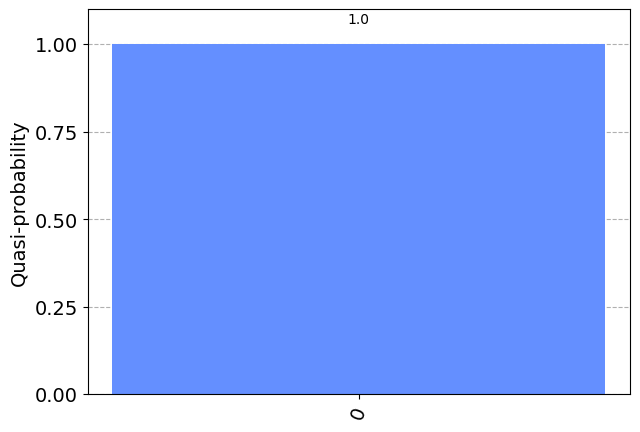

In [3]:
#Executo y obtengo los resultados con 1000 ejecuciones
job=execute(qc,backend,shots=1000)
result=job.result()
counts=result.get_counts()
plot_distribution(counts)

Vemos que el bit-flip se corrije y el estado a la salida sigue siendo 0. Podemos ver el estado de los tres qubits utilizando la esfera de bloch.

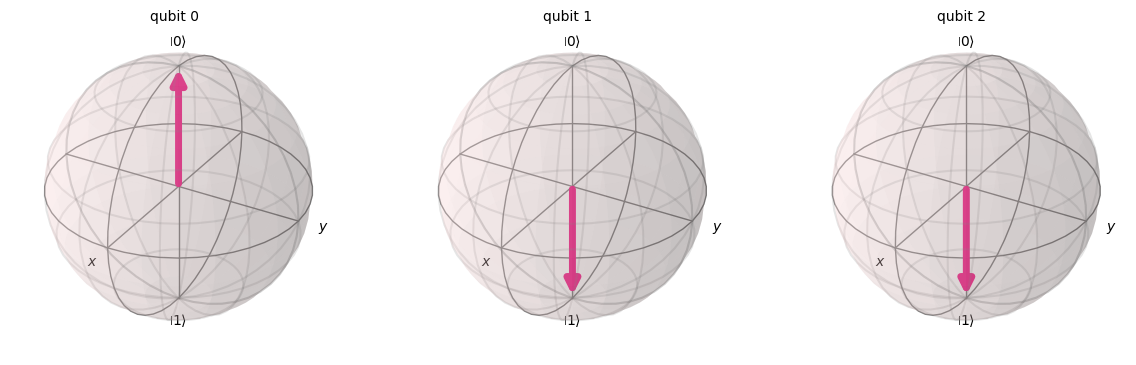

In [4]:
#Uso el metodo get_statevector para obtener el vector de estado
statevector=result.get_statevector(qc)
#Dibujo los qubits en la esfera de bloch
plot_bloch_multivector(statevector)

In [5]:
import qiskit.tools.jupyter
%qiskit_version_table